In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import tensorflow as tf

from tensorflow import keras

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir=".", untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob("*/*.jpg"))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [6]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

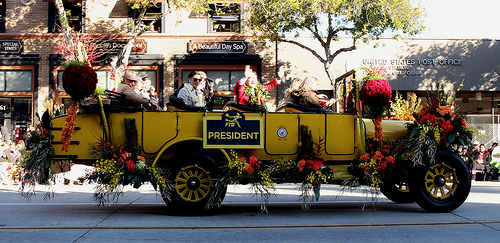

In [7]:
roses = list(data_dir.glob("roses/*"))
PIL.Image.open(str(roses[0]))

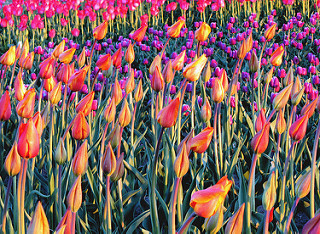

In [8]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_image_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [10]:
flowers_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [11]:
flowers_image_dict["roses"][0]

PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')

In [12]:
img = cv2.imread(str(flowers_image_dict["roses"][0]))
img.shape

(243, 500, 3)

In [13]:
#RESIZE THE IMAGE
cv2.resize(img, (180,180))

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [14]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [33]:
num_classes = 5

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(num_classes),
])

model.compile(
    optimizer="adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 478ms/step - accuracy: 0.3293 - loss: 1.9083
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 456ms/step - accuracy: 0.5959 - loss: 1.0141
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 372ms/step - accuracy: 0.6874 - loss: 0.8403
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 326ms/step - accuracy: 0.7731 - loss: 0.6299
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - accuracy: 0.8561 - loss: 0.4220
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 326ms/step - accuracy: 0.9192 - loss: 0.2444
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - accuracy: 0.9600 - loss: 0.1411
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 328ms/step - accuracy: 0.9832 - loss: 0.0774
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.9837 - loss: 0.0573
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.9880 - loss: 0.0488


In [34]:
model.evaluate(X_test_scaled, y_test)
#OVERFITTING ISSUE

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.6331 - loss: 1.7458


[1.8179869651794434, 0.6437908411026001]

In [36]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step


array([[ -0.72549236,   5.9552503 ,  -1.9602041 , -13.805501  ,
         -9.802225  ],
       [  5.978523  ,  -0.4810332 ,  -7.1051555 ,  -2.0856397 ,
         -0.314192  ],
       [ -2.538364  ,  -6.9553    ,   8.874781  ,  -4.6767616 ,
        -12.339957  ],
       ...,
       [ -8.394473  ,  -8.165541  ,  -4.4919796 ,   7.027893  ,
         -1.6628903 ],
       [  1.5747476 ,  -0.13796248,  -5.192384  ,  -4.782208  ,
          2.7604458 ],
       [-12.840286  , -18.220737  ,  -5.3701158 ,  16.694763  ,
         -0.68059045]], dtype=float32)

In [37]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.2528162e-03, 9.9838269e-01, 3.6446759e-04, 2.6140363e-09,
       1.4318998e-07], dtype=float32)>

In [38]:
np.argmax(score)

1

In [39]:
y_test[0]

1

In [55]:
#USE DATA AUGMENTAION TO AVOID OVERFITTING

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

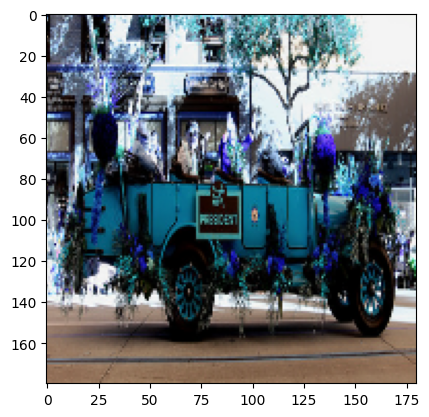

In [56]:
plt.imshow(X[0])

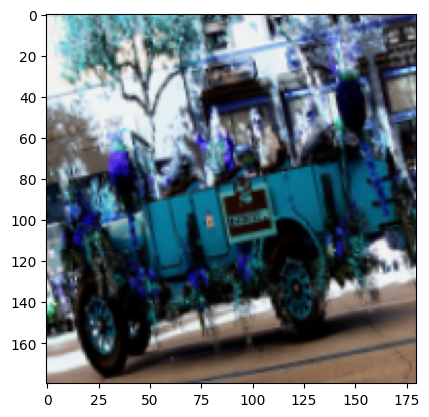

In [57]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [58]:
num_classes = 5

model = keras.models.Sequential([
    data_augmentation,

    keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Dropout(0.2), # drop 20% of neurons

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(num_classes),
])

model.compile(
    optimizer="adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 58s 649ms/step - accuracy: 0.3232 - loss: 1.5119
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 554ms/step - accuracy: 0.5267 - loss: 1.1521
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 499ms/step - accuracy: 0.6086 - loss: 0.9805
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 493ms/step - accuracy: 0.6448 - loss: 0.9308
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 516ms/step - accuracy: 0.6628 - loss: 0.8693
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 500ms/step - accuracy: 0.6806 - loss: 0.8059
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 500ms/step - accuracy: 0.6929 - loss: 0.7787
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 547ms/step - accuracy: 0.7448 - loss: 0.6888
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 480ms/step - accuracy: 0.7053 - loss: 0.7248
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 425ms/step - accuracy: 0.7472 - loss: 0.6887


In [61]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.6986 - loss: 0.7420


[0.7368383407592773, 0.6938998103141785]